In [54]:
import numpy as np
import matplotlib.pyplot as plt
from gekko import GEKKO

In [55]:
# create GEKKO model
m = GEKKO()

In [83]:
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

m = GEKKO()

nt = 501
tm = np.linspace(0,1,nt)
m.time = tm

# Variables
v = m.Var(value=0.0, lb=0.0, ub=10.0)
E = m.Var(value=2300.0, lb=0.0)
x = m.Var(value=0.0)

p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)

# FV
tf = m.FV(value=160.0,lb=0.1,ub=240.0)
tf.STATUS = 1

# MV
u = m.MV(value=0,lb=0,ub=12)
u.STATUS = 1

m.Equation(v.dt()==(u - v/0.892)*tf)
m.Equation(E.dt()==(33.0 - u*v)*tf)
m.Equation(x.dt()==v*tf)

m.Equation((1000-x)*final<=0)

m.Minimize(tf)

m.options.IMODE = 6
m.options.MAX_ITER=1000
m.solve()

print('Final Time: ' + str(tf.value[0]))

tm = tm * tf.value[0]

apm 90.156.80.122_gk_model16 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            7
   Intermediates:            0
   Connections  :            0
   Equations    :            5
   Residuals    :            5
 
 Number of state variables:           6001
 Number of total equations: -         5500
 Number of slack variables: -          500
 ---------------------------------------
 Degrees of freedom       :              1
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipo

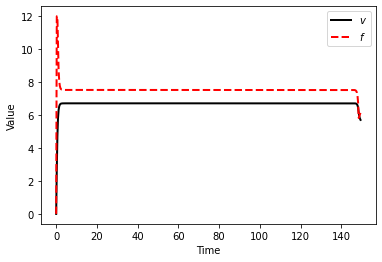

In [82]:
plt.figure(1)
plt.plot(tm,v.value,'k-',lw=2,label=r'$v$')
# plt.plot(tm,E.value,'b-',lw=2,label=r'$E$')
# plt.plot(tm,x.value,'g--',lw=2,label=r'$x$')
plt.plot(tm,u.value,'r--',lw=2,label=r'$f$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [ ]:
# https://gekko.readthedocs.io/en/latest/model_methods.html